## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single dataset
data_df = mouse_metadata.merge(study_results, how='left', on= 'Mouse ID')


In [3]:
# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = data_df[data_df.duplicated()]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df = data_df.set_index('Mouse ID')
dupmouse = mouse_df.loc['g989', :]
dupmouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropping the mouse completely does not make sense retaining the good data seems like the better option while dropping the duplicate info
clean_data_df = data_df.drop_duplicates(['Mouse ID','Timepoint'], keep='last')
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data_df['Mouse ID'].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumor_mean_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_mean_df = tumor_mean_df.rename(columns={'Tumor Volume (mm3)':'Mean Volume'})

tumor_median_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_median_df = tumor_median_df.rename(columns={'Tumor Volume (mm3)':'Median Volume'})

tumor_mean_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_mean_df = tumor_mean_df.rename(columns={'Tumor Volume (mm3)':'Mean Volume'})

tumor_median_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_median_df = tumor_median_df.rename(columns={'Tumor Volume (mm3)':'Median Volume'})

tumor_std_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
tumor_std_df = tumor_std_df.rename(columns={'Tumor Volume (mm3)':'STD Volume'})

tumor_var_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_var_df = tumor_var_df.rename(columns={'Tumor Volume (mm3)':'Var Volume'})

tumor_sem_df = pd.DataFrame(data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
tumor_sem_df = tumor_sem_df.rename(columns={'Tumor Volume (mm3)':'SEM Volume'})

# Assemble the resulting series into a single summary dataframe.
merge_df = tumor_mean_df.join(tumor_median_df)
merge_df = merge_df.join(tumor_std_df)
merge_df = merge_df.join(tumor_var_df)
merge_df = merge_df.join(tumor_sem_df)
merge_df

,Mean Volume,Median Volume,STD Volume,Var Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_data_df['Tumor Volume (mm3)'].describe()

count    1888.000000
mean       50.448411
std         8.904752
min        22.050126
25%        45.000000
50%        48.951421
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

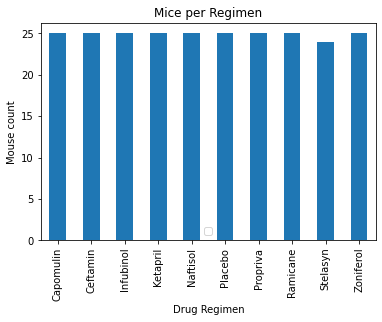

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_df = data_df.groupby('Drug Regimen')
regimen_count = pd.DataFrame(regimen_df['Mouse ID'].nunique())
regimen_count.plot(kind='bar', title='Mice per Regimen')
plt.legend('')
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")
plt.show()

In [12]:
#double checking mice per regimen count
regimen_count

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


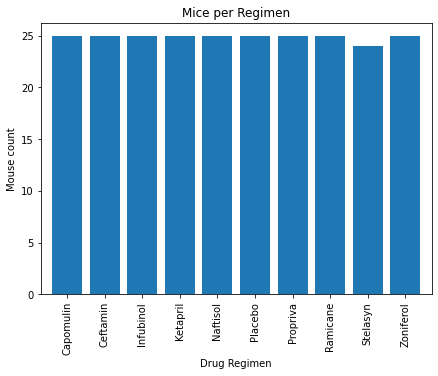

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_count))
tick_loc = [value for value in x_axis]

plt.figure(figsize=(7,5))
plt.bar(x_axis, regimen_count['Mouse ID'], align="center")
plt.xticks(tick_loc, list(regimen_count.index), rotation='vertical')

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(regimen_count['Mouse ID'])*1.05)

plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")


plt.show()

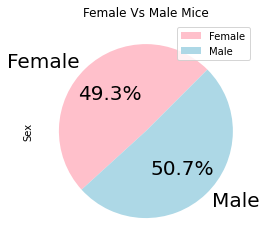

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_data_df.groupby('Sex')
gender_count = pd.DataFrame(gender_df['Sex'].count())
gender_count.plot(kind='pie', y='Sex', colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=45, fontsize=20)
plt.title('Female Vs Male Mice')
plt.show()

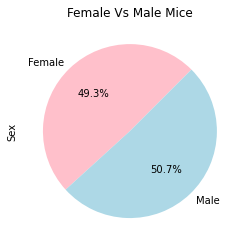

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count['Sex'], labels=['Female', 'Male'], colors=['pink', 'lightblue'], autopct='%1.1f%%', startangle=45)
plt.title('Female Vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_regimen = clean_data_df[clean_data_df['Drug Regimen'].isin(regimen_list)]
timepoint = ['45']
four_regimen = four_regimen[four_regimen['Timepoint'].isin(timepoint)]
four_regimen = four_regimen.sort_values(["Timepoint"], ascending=True)
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

four_regimen


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
370,s710,Capomulin,Female,1,23,45,40.728578,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
390,r944,Capomulin,Male,12,25,45,41.581521,2
400,e662,Ramicane,Male,8,24,45,40.659006,2
...,...,...,...,...,...,...,...,...
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
309,b128,Capomulin,Female,9,22,45,38.982878,2
164,t565,Capomulin,Female,20,17,45,34.455298,0


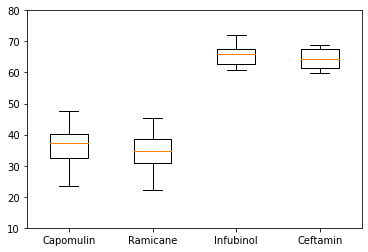

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_df = four_regimen.reset_index()
tumor_lists = box_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(regimen_list)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=regimen_list)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

<AxesSubplot:>

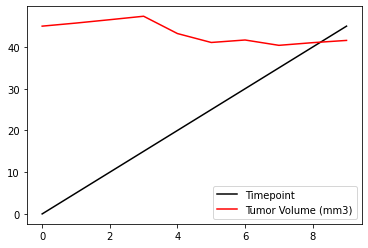

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin ID (r944)
volumevtime = clean_data_df[clean_data_df['Mouse ID'].isin(['r944'])]
volumevtime = volumevtime.reset_index()
volumevtime = volumevtime[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]



line_plot = volumevtime.plot.line(color= ['black', 'red'])
line_plot

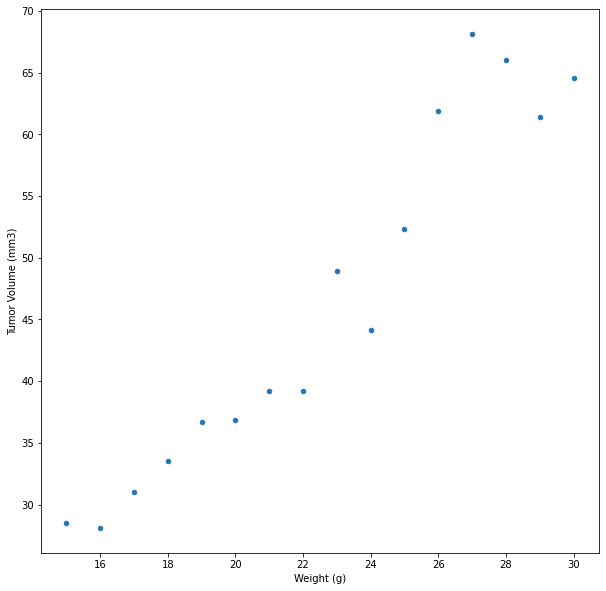

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter = clean_data_df[clean_data_df['Drug Regimen'].isin(['Capomulin'])]

cap_scatter = four_regimen[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]

cap_weight = cap_scatter.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

cap_scatter = pd.DataFrame(cap_weight).reset_index()

cap_scatter_plot = cap_scatter.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', figsize= (10,10))

## Correlation and Regression

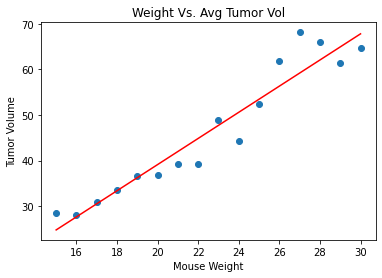

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_scatter['Weight (g)']
y_values = cap_scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize=10)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Weight Vs. Avg Tumor Vol')
plt.show()